<a href="https://colab.research.google.com/github/HarshMishra99/my_python_projects/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#get the stock  quote
import yfinance as yf

# Fetch the stock data
df = yf.download('AAPL', start='2019-01-01', end='2024-06-30')

# Show the data
print(df)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   38.722500   39.712502   38.557499   39.480000   37.793785   
2019-01-03   35.994999   36.430000   35.500000   35.547501   34.029240   
2019-01-04   36.132500   37.137501   35.950001   37.064999   35.481922   
2019-01-07   37.174999   37.207500   36.474998   36.982498   35.402950   
2019-01-08   37.389999   37.955002   37.130001   37.687500   36.077847   
...                ...         ...         ...         ...         ...   
2024-06-24  207.720001  212.699997  206.589996  208.139999  208.139999   
2024-06-25  209.149994  211.380005  208.610001  209.070007  209.070007   
2024-06-26  211.500000  214.860001  210.639999  213.250000  213.250000   
2024-06-27  214.690002  215.740005  212.350006  214.100006  214.100006   
2024-06-28  215.770004  216.070007  210.300003  210.619995  210.619995   

               Volume  
Date         

In [ ]:
df.shape

(1363, 6)

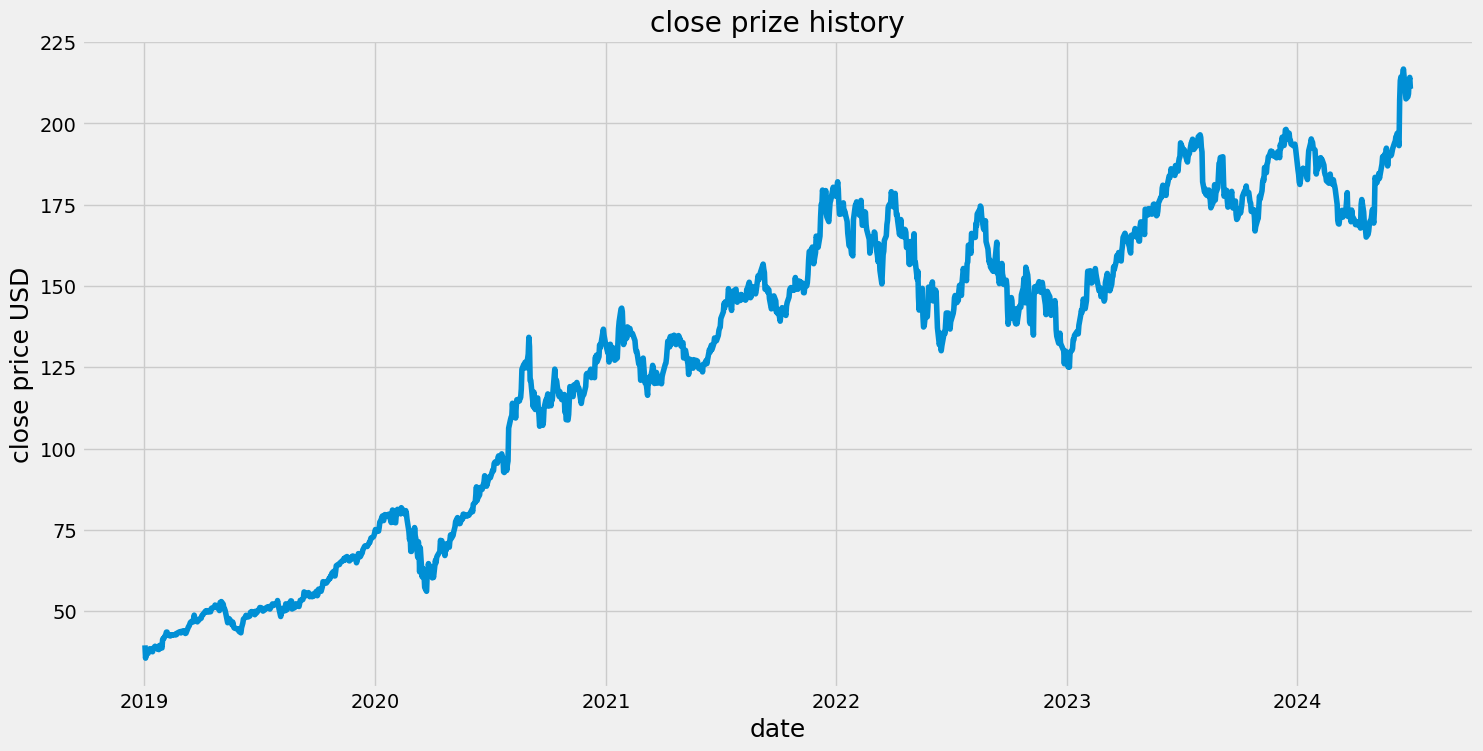

In [ ]:
plt.figure(figsize=(16,8))
plt.title('close prize history')
plt.plot(df['Close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('close price USD',fontsize=18)
plt.show()

In [ ]:
#create a new data frame with only the comumn
data= df.filter(['close'])
#convert the data frame to a numpy
dataset=data.values
#get no. of rows
training_data_ion= math.ceil(len(dataset)*.8)
training_data_ion

1106

In [ ]:
# Ensure the data is loaded correctly
if df.empty:
    print("Failed to fetch data. Please check your date range or symbol.")
else:
    # Select the relevant column(s), e.g., 'Close'
    dataset = df[['Close']].dropna()

    # Initialize the scaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    # Fit and transform the data
    scaled_data = scaler.fit_transform(dataset)
    # Convert the scaled data back to a DataFrame for easier handling
    scaled_df = pd.DataFrame(scaled_data, columns=['Close'])
    # Show the scaled data
    print(scaled_df.head())


      Close
0  0.021712
1  0.000000
2  0.008378
3  0.007923
4  0.011815


In [ ]:
#create the training data set
#create the scaled training data set
train_data=scaled_data[0:training_data_ion,:]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.02171182, 0.        , 0.0083783 , 0.0079228 , 0.0118152 ,
       0.01534872, 0.01602507, 0.01394083, 0.01077999, 0.01501747,
       0.01759859, 0.01886844, 0.02019352, 0.01533493, 0.01619069,
       0.01450675, 0.02149097, 0.01947577, 0.0172397 , 0.03182928,
       0.03347182, 0.03358225, 0.04011097, 0.04415519, 0.04423802,
       0.03968309, 0.03895154, 0.03759885, 0.03961407, 0.03863406,
       0.03948985, 0.03896534, 0.03966927, 0.04118759, 0.03984871,
       0.04248506, 0.0442242 , 0.04436224, 0.04510758, 0.0427335 ,
       0.04524562, 0.04646027, 0.04601857, 0.0446245 , 0.04183632,
       0.04240224, 0.05067012, 0.05344449, 0.05454872, 0.05733688,
       0.06063575, 0.0632583 , 0.06120167, 0.06345153, 0.07301687,
       0.06744055, 0.0642521 , 0.06156053, 0.06387942, 0.06422449])]
[0.06592222825795757]

[array([0.02171182, 0.        , 0.0083783 , 0.0079228 , 0.0118152 ,
       0.01534872, 0.01602507, 0.01394083, 0.01077999, 0.01501747,
       0.01759859, 0.01886844, 0.02

In [ ]:
#convert the x _train and y_train to num py array
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1046, 60, 1)

In [ ]:
#build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the nodel
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1046/1046 [==============================] - 40s 34ms/step - loss: 0.0028


In [ ]:
# Define the length of the training dataset
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]

# Create the x_test and y_test datasets
x_test = []
y_test = dataset['Close'].values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to numpy array
x_test = np.array(x_test)

# Reshape x_test for the LSTM model if necessary
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Print the shapes of x_test and y_test to verify
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_test shape: (276, 60, 1)
y_test shape: (276,)


In [ ]:
#convert data to numpy array
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
#get the module pridicted price
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

9/9 [==============================] - 1s 15ms/step


In [ ]:
#get the root mean squared error{RMSE}
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

15.839495230412137

<ipython-input-68-c3f4773f23b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


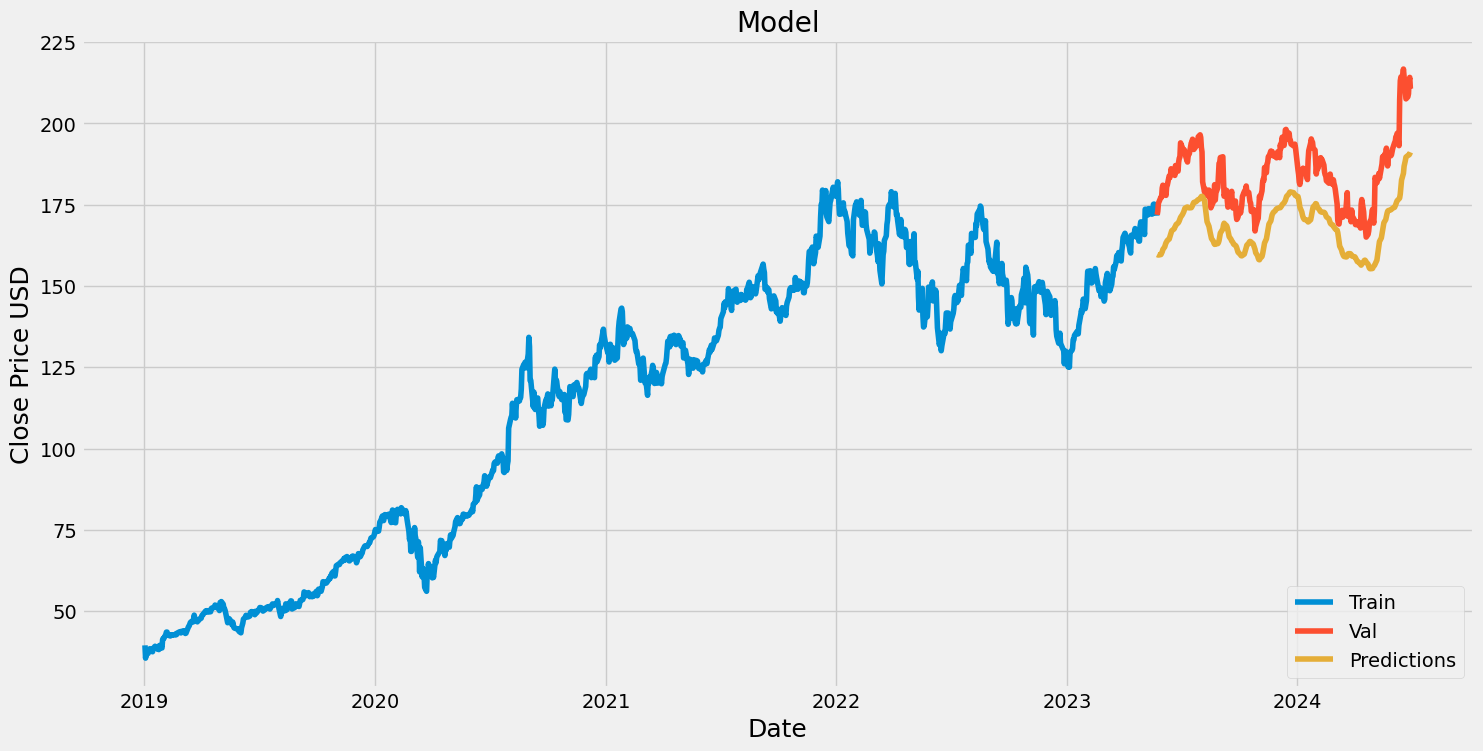

In [ ]:

# Create a DataFrame for the valid data and add predictions
valid = dataset[training_data_len:]
valid['Predictions'] = predictions

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(dataset[:training_data_len].index, dataset[:training_data_len]['Close'], label='Train')
plt.plot(valid.index, valid['Close'], label='Val')
plt.plot(valid.index, valid['Predictions'], label='Predictions')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
show_val=valid.tail(60)
show_val

,Close,Predictions
Date,,
2024-03-07,169.000000,183.397491
2024-03-08,170.729996,181.976181
2024-03-11,172.750000,180.731827
2024-03-12,173.229996,179.806732
2024-03-13,171.130005,179.163834
2024-03-14,173.000000,178.597260
2024-03-15,172.619995,178.252441
2024-03-18,173.720001,178.031387
2024-03-19,176.080002,177.977341


In [ ]:


# Fetch the stock data
apple_quote = yf.download('AAPL', start='2019-01-01', end='2024-07-31')

# Select the 'Close' column
new_df = apple_quote.filter(['Close'])

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data
scaled_data = scaler.fit_transform(new_df)

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the last 60 days of data
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
x_test = []

# Append the past 60 days
x_test.append(last_60_days_scaled)

# Convert the x_test data set to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predictions
pred_price = model.predict(x_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

# Print the predicted price
print(f"Predicted Close Price: {pred_price[0][0]} USD")


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 25ms/step
Predicted Close Price: 201.02862548828125 USD



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
#get the quote
apple_quote2=yf.download('AAPL',start='2024-07-30',end='2024-08-1')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2024-07-30    218.800003
Name: Close, dtype: float64
